# ML supervisado con scikit-learn 
Este notebook contiene el código para el curos de "ML supervisado con scikit-learn". Las librerias que se han usado son

```
pandas==1.1.5
plotnine==0.8.0
scikit-learn==0.24.2
```

Los datos utilizados son de Tweets descargados durante unos dias en agosto. Se pueden descargar [aquí](DATA).

Generalmente se cargaran as librerias cuando se utilicen. Esto no es necesariamente la mejor practica en general, pero lo hacemos asi para que sea más claro de donde vienen ciertas funciones.

In [1]:
import pandas as pd
import plotnine as pn


data_location = 'tweet_and_user_data.csv'

pd.options.display.max_columns = 500

In [2]:
tweet_data = pd.read_csv(data_location)

/Users/andreas/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.


In [3]:
tweet_data.shape

(40581, 56)

In [4]:
tweet_data.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_user,name_user,username_user,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
0,1425590913959612419,1425590913959612419,1.628722e+12,2021-08-12 00:52:14,200,NaN,RT @girlsalliance: We're so proud of the four ...,en,[],[],409486555,409486555,MichelleObama,Michelle Obama,4,0,https://twitter.com/MichelleObama/status/14255...,[],[],0,NaN,True,0,0,232,0,None,NaN,NaN,NaN,1.047165e+18,We're so proud of the four organizations in ou...,1.425590e+18,[],2021-08-12 00:46:58 CEST,NaN,NaN,NaN,409486555,Michelle Obama,MichelleObama,Girl from the South Side and former First Lady...,https://t.co/HPYP9ad13Y,2011-11-10 20:13:01 UTC,2011-11-10,20:13:01 UTC,1770,"Washington, DC",16,20854298,184,461,False,True,https://pbs.twimg.com/profile_images/136674780...,https://pbs.twimg.com/profile_banners/40948655...
1,1427736867739299841,1427736867739299841,1.629234e+12,2021-08-17 22:59:29,200,NaN,Some casual suggestions to 😏SLIDE😏 into when u...,en,"['shoesdaytuesday', 'afterskewlslide']",[],21447363,21447363,katyperry,KATY PERRY,2,22,https://twitter.com/katyperry/status/142773686...,[],['https://pbs.twimg.com/media/E9BXG4YVkAAl3_A....,1,https://pbs.twimg.com/media/E9BXG4YVkAAl3_A.jpg,False,5266,368,408,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
2,1427667300488937476,1427667300488937476,1.629217e+12,2021-08-17 18:23:03,200,NaN,RT @ValaAfshar: You are not your job.,en,[],[],21447363,21447363,katyperry,KATY PERRY,2,18,https://twitter.com/katyperry/status/142766730...,[],[],0,NaN,True,0,0,764,0,None,NaN,NaN,NaN,2.597252e+08,You are not your job.,1.427648e+18,[],2021-08-17 17:05:53 CEST,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
3,1427667012105371652,1427667012105371652,1.629217e+12,2021-08-17 18:21:55,200,NaN,What have we become 😔😂 Toddler Cites Freedom ...,en,[],[],21447363,21447363,katyperry,KATY PERRY,2,18,https://twitter.com/katyperry/status/142766701...,['https://www.theonion.com/toddler-cites-freed...,[],0,NaN,False,5638,476,438,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
4,1427497703596990467,1427497703596990467,1.629177e+12,2021-08-17 07:09:08,200,NaN,The tech giants that refuse to massively addre...,en,[],[],21447363,21447363,katyperry,KATY PERRY,2,7,https://twitter.com/katyperry/status/142749770...,[],[],0,NaN,False,8810,546,1211,https://twitter.com/VICENews/status/1427311204...,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...


No es necesario hacer una gran introducción a los datos ya que no es nuestro foco, pero para resumir:

* Tenemos X Tweets de unas cuentas famosas de Twitter
* Las variables son informacion estandar que nos facilita Twitter
* También incluimos información sobre las cuentas en si, también con datos facilitados por el API de Twitter

## Entrenando el primer modelo
Entrenamos unas regresiones sencillas para mostrar el sintaxis. Cogemos un par de variables y el numero de "likes" del Tweet como el target. Nota que no dividimos entre train y test.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X_variables = ['followers', 'video']
y_variable = 'nlikes'

In [6]:
model = LinearRegression()
model.fit(tweet_data[X_variables], tweet_data[y_variable])
tweet_data['predictions_lin_reg'] = model.predict(tweet_data[X_variables])

In [7]:
model = DecisionTreeRegressor(random_state=0)
model.fit(tweet_data[X_variables], tweet_data[y_variable])
tweet_data['predictions_dt_reg'] = model.predict(tweet_data[X_variables])

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 7132 rows containing missing values.


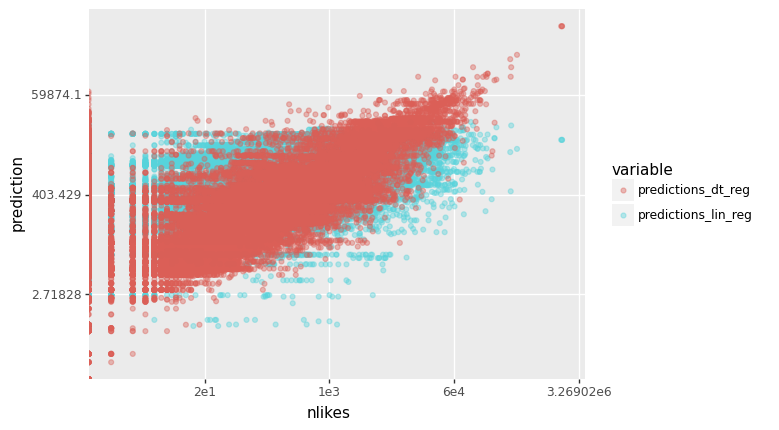

In [9]:
# Creamos un grafico simple para visualizar
columns = [y_variable, 'predictions_lin_reg', 'predictions_dt_reg']
graph_data = pd.melt(tweet_data[columns], y_variable)
graph = (
    pn.ggplot(graph_data, pn.aes(x='nlikes', y='value', color='variable')) 
    + pn.geom_point(alpha=0.4)
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
    + pn.ylab('prediction')

)

graph.draw();

## Los requisitos minimos para los datos
Ahora mostramos cómo sacamos nuestro "X" y "y" de los datos crudos.

In [10]:
X = tweet_data[X_variables]
y = tweet_data[y_variable]

In [11]:
X.head()

,followers,video
0,20854298,0
1,108819032,1
2,108819032,0
3,108819032,0
4,108819032,0


In [12]:
y.head()

0       0
1    5266
2       0
3    5638
4    8810
Name: nlikes, dtype: int64

In [13]:
model = LinearRegression()
model.fit(X, y)
model.predict(X)[:10]

array([ 2208.96109587, 14931.09346813, 12903.23640107, 12903.23640107,
       12903.23640107, 12903.23640107, 11874.23288725,  2301.11985276,
        4328.97691981,  2301.11985276])

Qué pasa si incluimos datos de texto o diferentes números de filas?

In [14]:
# Incluyendo datos de texto
X_variables = ['language', 'name']

X = tweet_data[X_variables]
y = tweet_data[y_variable]

model = LinearRegression()
model.fit(X, y)
model.predict(X)[:10]

ValueError: could not convert string to float: 'en'

In [15]:
X_variables = ['followers', 'video']

# Ahora cogemos solo 2000 filas para el X
X = tweet_data[X_variables].sample(2000, random_state=0)
y = tweet_data[y_variable]

model = LinearRegression()
model.fit(X, y)
model.predict(X)[:10]

ValueError: Found input variables with inconsistent numbers of samples: [2000, 40581]

## Ejemplos de pasos previos
Vamos a mostrar algunos pasos previos para dar contexto sobre la preparación de los datos.

In [17]:
# Remplezamos un valor
tweet_data.quote_url.replace('0', '')

0                                                         
1                                                         
2                                                         
3                                                         
4        https://twitter.com/VICENews/status/1427311204...
                               ...                        
40576                                                     
40577                                                     
40578                                                     
40579                                                     
40580                                                     
Name: quote_url, Length: 40581, dtype: object

In [18]:
# Remplezamos nulos
tweet_data.location.fillna('UNKNOWN')

0        Washington, DC
1               UNKNOWN
2               UNKNOWN
3               UNKNOWN
4               UNKNOWN
              ...      
40576             Ghana
40577             Ghana
40578             Ghana
40579             Ghana
40580             Ghana
Name: location, Length: 40581, dtype: object

In [19]:
# Creamos un feature
tweet_data['is_english'] = tweet_data.language == 'en'
tweet_data.is_english.value_counts()

True     30430
False    10151
Name: is_english, dtype: int64

In [20]:
# Convertimos a numerico
pd.get_dummies(tweet_data['language'])

,ar,ca,cs,cy,da,de,en,es,et,eu,fa,fi,fr,hi,ht,hu,in,is,it,iw,ja,ko,lt,lv,mr,nl,no,pl,pt,ro,ru,sv,ta,th,tl,tr,und,ur,vi,zh
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40576,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40577,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40578,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40579,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dividimos los datos
Tenemos varias maneras para dividir los datos, pero cuando queremos que sea random, sklearn es mejor que Pandas.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Con Pandas es un poco raro!
train = tweet_data.sample(frac=0.7, random_state=0)
test = tweet_data[~tweet_data.id.isin(train.id)]
print(train.shape)
print(test.shape)

(28407, 59)
(12174, 59)


In [23]:
train.head(2)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_user,name_user,username_user,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image,predictions_lin_reg,predictions_dt_reg,is_english
16245,1427872893333999618,1427872893333999618,1.629266e+12,2021-08-18 08:00:01,200,NaN,3 da manhã. Eu vejo tudo e ninguém me vê.,pt,[],[],382613598,382613598,SintoniaVerso,Frases,3,8,https://twitter.com/SintoniaVerso/status/14278...,[],[],0,NaN,False,286,2,105,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,382613598,Frases,SintoniaVerso,Twitter Fã Clube!\nParceria: @dazzoficial,https://t.co/oc9LpxirZE,2011-09-30 11:35:51 UTC,2011-09-30,11:35:51 UTC,159901,Brasil,1228,4113045,1417,8531,False,False,https://pbs.twimg.com/profile_images/136058054...,https://pbs.twimg.com/profile_banners/38261359...,173.650348,234.084314,False
20603,1425709887720464385,1425709887720464385,1.628751e+12,2021-08-12 08:45:00,200,NaN,This is the man behind the voice of Freddie Me...,en,[],[],972651,972651,mashable,Mashable,4,8,https://twitter.com/mashable/status/1425709887...,[],[],1,https://pbs.twimg.com/media/EwmlN5BWEAUxCxR.jpg,False,220,7,35,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,972651,Mashable,mashable,Mashable is for superfans. We're not for the c...,http://t.co/1Gm8aVACKn,2007-03-12 01:28:01 UTC,2007-03-12,01:28:01 UTC,436279,NaN,2729,9486463,1694,230691,False,True,https://pbs.twimg.com/profile_images/141058599...,https://pbs.twimg.com/profile_banners/972651/1...,2854.778434,46.985019,True


In [24]:
train, test = train_test_split(tweet_data, train_size=0.7, random_state=0)
print(train.shape)
print(test.shape)

(28406, 59)
(12175, 59)


In [25]:
train.head(2)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_user,name_user,username_user,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image,predictions_lin_reg,predictions_dt_reg,is_english
13473,1426688918062211075,1426624828895731714,1.628984e+12,2021-08-15 01:35:19,200,NaN,"@LeukemiaSurviv2 It deals with other stuff, too.",en,[],[],174144887,174144887,dumbassgenius,Rick G. Rosner,7,1,https://twitter.com/dumbassgenius/status/14266...,[],[],0,NaN,False,1,0,0,0,None,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'LeukemiaSurviv2', 'name': 'L...",NaN,NaN,NaN,NaN,174144887,Rick G. Rosner,dumbassgenius,"World's 2nd-highest IQ. (Recently fell to 3rd,...",https://t.co/V73LcJTja3,2010-08-03 06:03:04 UTC,2010-08-03,06:03:04 UTC,60944,Los Angeles,1879,892298,492144,12156,False,True,https://pbs.twimg.com/profile_images/506941989...,https://pbs.twimg.com/profile_banners/17414488...,-217.910605,7.249135,True
20613,1425665595467616260,1425665595467616260,1.628740e+12,2021-08-12 05:49:00,200,NaN,Flying car rides? Sign us up! https://t.co/OM...,en,[],[],972651,972651,mashable,Mashable,4,5,https://twitter.com/mashable/status/1425665595...,[],[],1,https://pbs.twimg.com/amplify_video_thumb/1372...,False,79,4,25,0,None,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,972651,Mashable,mashable,Mashable is for superfans. We're not for the c...,http://t.co/1Gm8aVACKn,2007-03-12 01:28:01 UTC,2007-03-12,01:28:01 UTC,436279,NaN,2729,9486463,1694,230691,False,True,https://pbs.twimg.com/profile_images/141058599...,https://pbs.twimg.com/profile_banners/972651/1...,2854.778434,46.985019,True


Fija bien en el `random_state`! Si repetimos el proceso tendremos resultados diferentes!

In [26]:
train.nlikes.describe()

count    2.840600e+04
mean     1.372927e+03
std      2.097233e+04
min      0.000000e+00
25%      5.000000e+00
50%      3.900000e+01
75%      1.980000e+02
max      1.920242e+06
Name: nlikes, dtype: float64

In [27]:
train, test = train_test_split(tweet_data, train_size=0.7)
print(train.shape)
print(test.shape)

(28406, 59)
(12175, 59)


In [28]:
train.nlikes.describe()

count    2.840600e+04
mean     1.307646e+03
std      1.787650e+04
min      0.000000e+00
25%      5.000000e+00
50%      3.900000e+01
75%      1.950000e+02
max      1.920242e+06
Name: nlikes, dtype: float64

Quizas queremos dividir en el tiempo, pero sin especificar una fecha exacta

In [29]:
train, test = train_test_split(tweet_data.sort_values('date'), train_size=0.7, random_state=0, shuffle=False)
print(train.shape, train.date.max())
print(test.shape, test.date.max())

(28406, 59) 2021-08-17 04:33:51
(12175, 59) 2021-08-19 00:00:00


## Pipelines
Creamos algo muy basico para mostrar cómo se utiliza - un pipeline de un único paso, entrar el modelo!

In [30]:
from sklearn.pipeline import Pipeline

In [31]:
X_variables = ['followers', 'video']
y_variable = 'nlikes'

linear_reg_pipeline = Pipeline(
    [
        ('linear_reg', LinearRegression())
    ]
)

linear_reg_pipeline.fit(tweet_data[X_variables], tweet_data[y_variable])
linear_reg_pipeline.predict(tweet_data[X_variables])[:10]

array([ 2208.96109587, 14931.09346813, 12903.23640107, 12903.23640107,
       12903.23640107, 12903.23640107, 11874.23288725,  2301.11985276,
        4328.97691981,  2301.11985276])

Podemos tambien acceder a los distintos pasos de nuestro pipeline

In [32]:
linear_reg_pipeline

Pipeline(steps=[('linear_reg', LinearRegression())])

In [33]:
linear_reg_pipeline['linear_reg']

LinearRegression()

## Funciones para la preparación de datos
Antes de incorporarlas en un pipeline, vamos a revisar algunas opciones que tenemos para la preparación de los datos.

Utilizaremos nuestro train y test de antes.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [7]:
train, test = train_test_split(tweet_data, train_size=0.7, random_state=0)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

Primero aplicamos un "estandarización" que es muy útil para ciertos modelos (redes neurales, SVM...)

In [36]:
# Standarizamos los datos
variables = ['followers', 'following']

print('Como se distribuye nuestro train:')
print(train[variables].describe().round())
print('\n')
print('Como se distribuye nuestro test:')
print(test[variables].describe().round())
print('\n\n')

follower_scaler = preprocessing.StandardScaler()
follower_scaler.fit(train[variables])

print('Ahora el train se distribuye:')
print(pd.DataFrame(follower_scaler.transform(train[variables])).describe().round())
print('\n')
print('Ahora el test se distribuye:')
print(pd.DataFrame(follower_scaler.transform(test[variables])).describe().round())

Como se distribuye nuestro train:
         followers  following
count      28406.0    28406.0
mean     9887747.0    11978.0
std     12896426.0   169942.0
min          107.0        0.0
25%      2937824.0      422.0
50%      4744108.0      862.0
75%     10255474.0     2342.0
max    129909278.0  4200793.0


Como se distribuye nuestro test:
         followers  following
count      12175.0    12175.0
mean     9892333.0    10672.0
std     12950297.0   147216.0
min         7037.0        0.0
25%      3039465.0      402.0
50%      4763490.0      862.0
75%     10255474.0     2206.0
max    129909278.0  4200793.0



Ahora el train se distribuye:
             0        1
count  28406.0  28406.0
mean      -0.0      0.0
std        1.0      1.0
min       -1.0     -0.0
25%       -1.0     -0.0
50%       -0.0     -0.0
75%        0.0     -0.0
max        9.0     25.0


Ahora el test se distribuye:
             0        1
count  12175.0  12175.0
mean       0.0     -0.0
std        1.0      1.0
min       -1.0 

Notas:

* En el último paso, teniamos que convertir la salida de `transform` (un numpy array) a un data frame para aprovechar el `describe` de Pandas
* Hemos utilizado `round` despues del `describe` para simplificar la salida y poder ver mejor el resultado

Reto: Intenta hacer esto con Pandas! Hace falta sacar la media y STD de train y luego aplicar la formula para el estandarización en el test - no dificil pero facil de equivocarse!

Ahora intentamos remplazar unos nulos...

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
variables = ['language', 'location']

location_replace = SimpleImputer(strategy='constant',fill_value='UNKNOWN')

location_replace.fit(train[variables])

location_replace.transform(train[variables])

array([['en', 'Los Angeles'],
       ['en', 'UNKNOWN'],
       ['es', 'New York City'],
       ...,
       ['en', 'New York, NY'],
       ['en', 'UNKNOWN'],
       ['en', 'New York City']], dtype=object)

Nuestros datos no tienen tantos problemas de nulos entonces es dificil mostrar la útilidad. También nos permite replazar con el valor más común, la media, etc.

Existen muchas más funciones pero no tenemos tiempo para mirar todo (no seria útil de todas formas). Todos utilizan el mismo sintaxis de `fit` y `transform`.

Para todos las funciones que preparan los datos, tambien existe el meotodo `fit_transform` que nos permite hacer el `fit` y `transform` del train en un único paso - pero no vale para el test!

## Convertiendo columnas a númerico
Muchas veces tenemos que utilizar variables no númericas, pero nuestra condición basica para el entranamiento era tener todo númerico. Hay varias opciones, pero la más común es el `OneHotEncoder`...

In [39]:
# Standarizamos los datos
variables = ['language']

encoder = preprocessing.OneHotEncoder()
encoder.fit(train[variables])

pd.DataFrame(encoder.transform(train[variables]).toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28401,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28402,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28403,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28404,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
print(encoder.categories_)

[array(['ar', 'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'eu', 'fa',
       'fi', 'fr', 'hi', 'ht', 'in', 'is', 'it', 'iw', 'ja', 'ko', 'lt',
       'lv', 'mr', 'nl', 'no', 'pl', 'pt', 'ro', 'ru', 'sv', 'ta', 'th',
       'tl', 'tr', 'und', 'ur', 'vi', 'zh'], dtype=object)]


Imagina que solo queremos considerar ingles y castellano...

In [41]:
# Standarizamos los datos
variables = ['language']
languages = ['en', 'es']

encoder = preprocessing.OneHotEncoder(categories=[languages], handle_unknown='ignore')
encoder.fit(train[variables])

pd.DataFrame(encoder.transform(train[variables]).toarray())

,0,1
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
28401,1.0,0.0
28402,1.0,0.0
28403,1.0,0.0
28404,1.0,0.0


In [42]:
print(encoder.categories_)

[array(['en', 'es'], dtype=object)]


Vimos en Pandas que teniamos nuestro `get_dummies` - pero vamos que hacemos si existe un valor en test que no está en train? En scikit-learn no tenemos ningún problema...

## Construyendo un Pipeline más completo
Queremos ahora construir un modelo similar al de antes, pero ahora utilizando nuestras funciones. Lo único dificil es tratar las columnas que necesitan diferentes pasos...

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
/home/andreas/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 662 rows containing missing values.


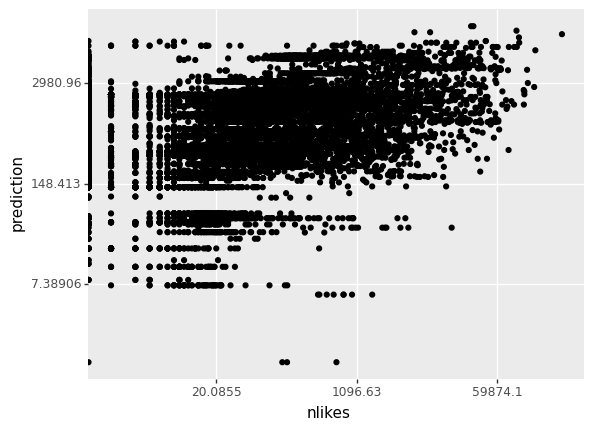

In [44]:
numeric_variables = ['following', 'followers']
numeric_pipeline = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)

categoric_variables = ['language']
languages = ['en', 'es']
categoric_pipeline = Pipeline(
    [
        ('encoder', OneHotEncoder(categories=[languages], handle_unknown='ignore'))
    ]
)

# Tenemos que juntar nuestros Pipelines aqui con un sintaxis similar al Pipeline normal
preprocessing = ColumnTransformer(
    [
        ('numeric', numeric_pipeline, numeric_variables),
        ('categorical', categoric_pipeline, categoric_variables)
    ]
)

full_pipeline = Pipeline(
    [
        ('preprocessing', preprocessing),
        ('regression', LinearRegression())
    ]
)

X_variables = numeric_variables + categoric_variables
y_variable = 'nlikes'

full_pipeline.fit(train[X_variables], train[y_variable])

test['prediction'] = full_pipeline.predict(test[X_variables])

graph = (
    pn.ggplot(test, pn.aes(x='nlikes', y='prediction')) 
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph.draw();

In [45]:
from sklearn import set_config

set_config(display='diagram')
full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['following', 'followers']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(categories=[['en',
                                                                                              'es']],
                                                                                 handle_unknown='ignore'))]),
                                                  ['language'])])),
                ('regression', LinearRegression())])

In [46]:
train[X_variables]

,following,followers,language
0,1879,892298,en
1,2729,9486463,en
2,841,50252746,es
3,229,1039067,en
4,145,2827393,en
...,...,...,...
28401,7,11678505,en
28402,7056,3802924,en
28403,577,8170432,en
28404,217,5684902,en


Hemos conseguido entranar nuestro modelo empezando con los datos que vemos arriba, que claramente no estan aptos para el modelo, pero gracias al `Pipeline` conseguimos hacer el proceso entero en un paso y sin tocar los datos de test!

## Los modelos disponibles
Ahora vamos a ir viendo los diferentes modelos que hay. Antes de todo - vamos a también crear un target de clasificación para mostrar los modelos de clasificación. Simplemente marcamos si un tweet tuvo más de 50 likes.

Ojo que no vamos a ver temas de evaluación ni optimización hasta el final!

In [8]:
train['nlikes_50'] = train.nlikes > 50
test['nlikes_50'] = test.nlikes > 50

print(train.nlikes_50.mean(), test.nlikes_50.mean())

0.45705132718439767 0.45642710472279263


### GLM
Vamos a ver las regresiones lineales y logisticas

In [12]:
from sklearn.linear_model import LinearRegression, LogisticRegression

X_variables = ['followers', 'video']
y_variable_reg = 'nlikes'
y_variable_class = 'nlikes_50'

In [14]:
reg_model = LinearRegression()
reg_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_lin_reg'] = reg_model.predict(test[X_variables])

In [50]:
log_model = LogisticRegression(random_state=0)
log_model.fit(train[X_variables], train[y_variable_class])
test['predictions_log_reg'] = log_model.predict(test[X_variables])

In [51]:
test[[y_variable_reg, 'predictions_lin_reg']]

,nlikes,predictions_lin_reg
0,286,173.023243
1,220,2994.912376
2,5,1075.285498
3,13,-112.351098
4,2,-43.562768
...,...,...
12170,344,6316.366776
12171,36,36.440639
12172,312,2134.319331
12173,4,-196.399344


In [52]:
test[[y_variable_class, 'predictions_log_reg']]

,nlikes_50,predictions_log_reg
0,True,True
1,True,True
2,False,True
3,False,True
4,False,True
...,...,...
12170,True,True
12171,False,True
12172,True,True
12173,False,True


Muy similar todo hasta ahora - vamos a mirar las cosas especificas de los GLM

In [53]:
X_variables

['followers', 'video']

In [54]:
reg_model.coef_, reg_model.intercept_

(array([1.22315153e-04, 2.16463869e+03]), -330.0644872881883)

In [55]:
log_model.coef_, reg_model.intercept_

(array([[2.69062678e-08, 1.88105662e-15]]), -330.0644872881883)

Podemos entrar sin intercept si queremos...

In [56]:
reg_model = LinearRegression(fit_intercept=False)
reg_model.fit(train[X_variables], train[y_variable_reg]);

In [57]:
reg_model.coef_, reg_model.intercept_

(array([1.11950594e-04, 1.94214264e+03]), 0.0)

Y tambien hay muchos más hiperparametros con los cuales podemos jugar

Lo más especial de la regresion logistica es poder predecir una probabilidad...

In [58]:
probability = log_model.predict_proba(test[X_variables])

In [59]:
probability

array([[0.47236153, 0.52763847],
       [0.43653287, 0.56346713],
       [0.42332424, 0.57667576],
       ...,
       [0.36769858, 0.63230142],
       [0.49264978, 0.50735022],
       [0.45163795, 0.54836205]])

In [60]:
test['predictions_log_reg_proba'] = probability[:, 1]

In [61]:
test[[y_variable_class, 'predictions_log_reg_proba']]

,nlikes_50,predictions_log_reg_proba
0,True,0.527638
1,True,0.563467
2,False,0.576676
3,False,0.511971
4,False,0.515751
...,...,...
12170,True,0.811846
12171,False,0.520145
12172,True,0.632301
12173,False,0.507350


In [62]:
test.groupby('nlikes_50')[['predictions_log_reg', 'predictions_log_reg_proba']].mean()

,predictions_log_reg,predictions_log_reg_proba
nlikes_50,,
False,True,0.539616
True,True,0.590099


La predicción original no era muy útil porque predecia todo como `True`, pero vemos que la probabilidad si que es más alto para los casos verdaderos,  asi que algo de utilidad si que tiene. Aquí también vemos la deblidad de los modelos más basicos - tenemos que hacer más esfuerzo para conseguir un resultado más útil.

### Near neighbours

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [65]:
reg_neigh_model = KNeighborsRegressor()
reg_neigh_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_neigh_reg'] = reg_neigh_model.predict(test[X_variables])

In [66]:
clas_neigh_model = KNeighborsClassifier()
clas_neigh_model.fit(train[X_variables], train[y_variable_class])
test['predictions_neigh_clas'] = clas_neigh_model.predict(test[X_variables])

In [67]:
test[[y_variable_reg, 'predictions_lin_reg', 'predictions_neigh_reg']]

,nlikes,predictions_lin_reg,predictions_neigh_reg
0,286,173.023243,176.2
1,220,2994.912376,34.6
2,5,1075.285498,15.0
3,13,-112.351098,5.8
4,2,-43.562768,17.2
...,...,...,...
12170,344,6316.366776,648.2
12171,36,36.440639,23.4
12172,312,2134.319331,326.2
12173,4,-196.399344,17.2


In [68]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_neigh_clas']]

,nlikes_50,predictions_log_reg,predictions_neigh_clas
0,True,True,True
1,True,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
12170,True,True,True
12171,False,True,False
12172,True,True,True
12173,False,True,False


Cambiamos el número de vecinos a utilizar para ver cómo cambian los resultados...

In [69]:
reg_neigh_model = KNeighborsRegressor(n_neighbors=10)
reg_neigh_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_neigh_reg_10'] = reg_neigh_model.predict(test[X_variables])

In [70]:
clas_neigh_model = KNeighborsClassifier(n_neighbors=10)
clas_neigh_model.fit(train[X_variables], train[y_variable_class])
test['predictions_neigh_clas_10'] = clas_neigh_model.predict(test[X_variables])

In [71]:
test[[y_variable_reg, 'predictions_lin_reg', 'predictions_neigh_reg', 'predictions_neigh_reg_10']].mean()

nlikes                      1241.028665
predictions_lin_reg         1356.049415
predictions_neigh_reg       1106.883959
predictions_neigh_reg_10    1009.731844
dtype: float64

In [72]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_neigh_clas', 'predictions_neigh_clas_10']].mean()

nlikes_50                    0.456427
predictions_log_reg          1.000000
predictions_neigh_clas       0.425791
predictions_neigh_clas_10    0.356140
dtype: float64

Parece ser que cuanto mas vecinos, más reduce la prediccion - somos mas conservadores - que tiene sentido.

### SVM
Ahora es muy importante escalar los datos - asi que volvems a nuestro pipeline!

In [73]:
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [74]:
reg_svm_model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svm', SVR())
    ]
)

reg_svm_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_svm_reg'] = reg_svm_model.predict(test[X_variables])

In [75]:
clas_svm_model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svm', SVC())
    ]
)

clas_svm_model.fit(train[X_variables], train[y_variable_class])
test['predictions_svm_clas'] = clas_svm_model.predict(test[X_variables])

In [76]:
test[[y_variable_reg, 'predictions_lin_reg', 'predictions_svm_reg']]

,nlikes,predictions_lin_reg,predictions_svm_reg
0,286,173.023243,18.210830
1,220,2994.912376,129.258919
2,5,1075.285498,52.768867
3,13,-112.351098,12.124024
4,2,-43.562768,13.217024
...,...,...,...
12170,344,6316.366776,291.394786
12171,36,36.440639,14.801627
12172,312,2134.319331,94.437706
12173,4,-196.399344,11.150636


In [77]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_svm_clas']]

,nlikes_50,predictions_log_reg,predictions_svm_clas
0,True,True,False
1,True,True,True
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
12170,True,True,True
12171,False,True,False
12172,True,True,True
12173,False,True,False


Lo más interesante de los SVM es cambiar el kernel, asi que intentamos hacer esto para ver como cambian los resultados...

In [78]:
clas_svm_kernel_model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='linear'))
    ]
)

clas_svm_kernel_model.fit(train[X_variables], train[y_variable_class])
test['predictions_svm_kernel_clas'] = clas_svm_kernel_model.predict(test[X_variables])

In [79]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_svm_clas', 'predictions_svm_kernel_clas']]

,nlikes_50,predictions_log_reg,predictions_svm_clas,predictions_svm_kernel_clas
0,True,True,False,False
1,True,True,True,True
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
12170,True,True,True,True
12171,False,True,False,False
12172,True,True,True,True
12173,False,True,False,False


In [81]:
test[['predictions_svm_clas', 'predictions_svm_kernel_clas']].mean()

predictions_svm_clas           0.345133
predictions_svm_kernel_clas    0.353265
dtype: float64

Y también tenemos muchas más posibilidades para ajustar los hiperparametros...

### Arboles
Los modelos basados en arboles son muchos y son muy poderosos! Para aprovechar de esto, también vamos a explotar unas variables más.

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [18]:
X_variables = ['followers', 'retweet', 'video', 'tweets', 'likes', 'following', 'media', 'verified', 'day', 'hour']

In [19]:
reg_tree_model = DecisionTreeRegressor(random_state=0)
reg_tree_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_tree_reg'] = reg_tree_model.predict(test[X_variables])

In [85]:
clas_tree_model = DecisionTreeClassifier(random_state=0)
clas_tree_model.fit(train[X_variables], train[y_variable_class])
test['predictions_tree_clas'] = clas_tree_model.predict(test[X_variables])

In [86]:
test[[y_variable_reg, 'predictions_lin_reg', 'predictions_tree_reg']]

,nlikes,predictions_lin_reg,predictions_tree_reg
0,286,173.023243,222.000000
1,220,2994.912376,33.000000
2,5,1075.285498,27.500000
3,13,-112.351098,4.333333
4,2,-43.562768,16.000000
...,...,...,...
12170,344,6316.366776,472.500000
12171,36,36.440639,30.000000
12172,312,2134.319331,188.500000
12173,4,-196.399344,3.000000


In [87]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_tree_clas']]

,nlikes_50,predictions_log_reg,predictions_tree_clas
0,True,True,True
1,True,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
12170,True,True,True
12171,False,True,False
12172,True,True,True
12173,False,True,False


Lo otro interesante de estos modelos es que son faciles de intepretar, por ejemplo, podemos dibujar el "arbol" para entenderlo. Vamos a entrenar un modelo reducido para visualizar mejor. Explicaremos el parametro `max_depth` despues.

In [88]:
from sklearn import tree
from matplotlib import pyplot as plt

In [89]:
clas_tree_model_reduced = DecisionTreeClassifier(max_depth=3)
clas_tree_model_reduced.fit(train[X_variables], train[y_variable_class]);

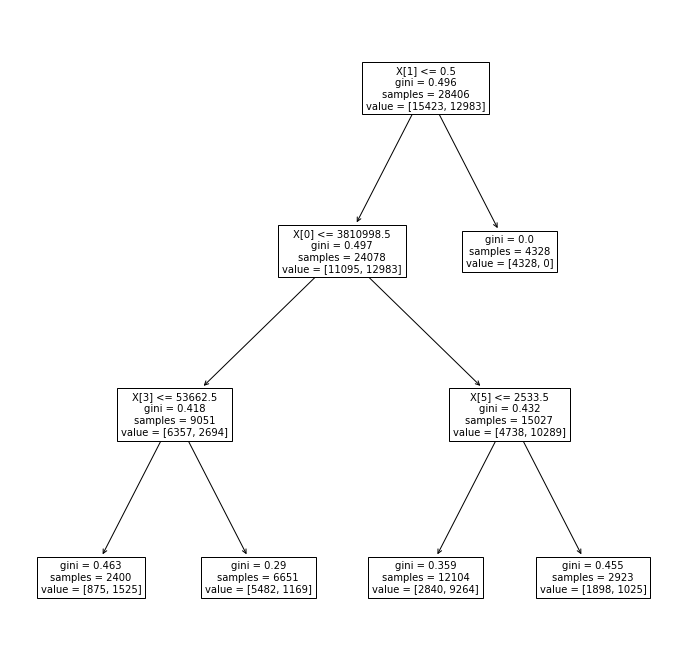

In [90]:
plt.figure(figsize=(12, 12))
tree.plot_tree(clas_tree_model_reduced, fontsize=10)
plt.show()

In [91]:
[(i, variable) for i, variable in enumerate(X_variables)]

[(0, 'followers'),
 (1, 'retweet'),
 (2, 'video'),
 (3, 'tweets'),
 (4, 'likes'),
 (5, 'following'),
 (6, 'media'),
 (7, 'verified'),
 (8, 'day'),
 (9, 'hour')]

Otra cosa que también podemos ver es la "importancia" de cada feature:

In [92]:
[(imp, variable) for imp, variable in zip(clas_tree_model_reduced.feature_importances_, X_variables)]

[(0.3145427445881898, 'followers'),
 (0.39645557460825487, 'retweet'),
 (0.0, 'video'),
 (0.13850028154210797, 'tweets'),
 (0.0, 'likes'),
 (0.1505013992614473, 'following'),
 (0.0, 'media'),
 (0.0, 'verified'),
 (0.0, 'day'),
 (0.0, 'hour')]

Apreciamos que el número de followers, following, si es un retweet y el número de tweets total son los más imporatntes, ya que han pertimido reducir más el error. Esto se puede utilizar para feature seleccion en otro momento.

El poder real de los modelos de arboles vienen con ensembling. Un modelo que aprovecha de ensembling es el RandomForest - asi que probamos a implementarlo aquí.

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [94]:
reg_rf_model = RandomForestRegressor(random_state=0)
reg_rf_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_rf_reg'] = reg_rf_model.predict(test[X_variables])

In [95]:
clas_rf_model = RandomForestClassifier(random_state=0)
clas_rf_model.fit(train[X_variables], train[y_variable_class])
test['predictions_rf_clas'] = clas_rf_model.predict(test[X_variables])

In [96]:
test[[y_variable_reg, 'predictions_lin_reg', 'predictions_tree_reg', 'predictions_rf_reg']]

,nlikes,predictions_lin_reg,predictions_tree_reg,predictions_rf_reg
0,286,173.023243,222.000000,310.218333
1,220,2994.912376,33.000000,32.327000
2,5,1075.285498,27.500000,29.635962
3,13,-112.351098,4.333333,4.462786
4,2,-43.562768,16.000000,20.783214
...,...,...,...,...
12170,344,6316.366776,472.500000,421.382524
12171,36,36.440639,30.000000,25.990000
12172,312,2134.319331,188.500000,231.932833
12173,4,-196.399344,3.000000,7.051333


In [97]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_tree_clas', 'predictions_rf_clas']]

,nlikes_50,predictions_log_reg,predictions_tree_clas,predictions_rf_clas
0,True,True,True,True
1,True,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
12170,True,True,True,True
12171,False,True,False,False
12172,True,True,True,True
12173,False,True,False,False


Los modelos basados en arboles son muy propoensos a overfitting - asi que vamos a ajustar diferentes parametros para limitar estos efectos. Primero introducimos el concepto del `score` de un modelo. Es una metrica estandar para el algoritmo (luego veremos más sobre evaluación).

Para mostrar el overfitting vamos a coger una muestra reducida del train y adjustar los parametros del modelo para provocar un sobre entrenamiento.

In [98]:
reduced_train = train.sample(1000, random_state=0)

clas_rf_model_overtrain = RandomForestClassifier(n_estimators=1000, random_state=0)
clas_rf_model_overtrain.fit(reduced_train[X_variables], reduced_train[y_variable_class]);

In [99]:
clas_rf_model_overtrain.score(reduced_train[X_variables], reduced_train[y_variable_class]).round(2)

0.99

In [100]:
clas_rf_model_overtrain.score(test[X_variables], test[y_variable_class]).round(2)

0.82

Vemos que hemos producido un modelo que tiene una gran diferencia entre el score de train y test - indicando que hay algo de overfitting.

Limitamos lo profundo que puede ser el arbol y tambien cuantos ejemplos puede estar en el split. 

In [101]:
clas_rf_model_overtrain_adj = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_split=7, min_samples_leaf=3, random_state=0)
clas_rf_model_overtrain_adj.fit(reduced_train[X_variables], reduced_train[y_variable_class]);

In [102]:
clas_rf_model_overtrain_adj.score(reduced_train[X_variables], reduced_train[y_variable_class]).round(2)

0.9

In [103]:
clas_rf_model_overtrain_adj.score(test[X_variables], test[y_variable_class]).round(2)

0.83

Vemos que hemos conseguido reducir mucho la diferencia entre el train y test, manteniendo el score de test más o menos igual. También vimos antes que reduciendo el `max_depth` fue más facil visualizar el arbol.

### Redes neurales
Con los redes neurales tenemos muchas maneras de construir la red, desde las funciones de activación hasta la arquitectura. Probamos a ver cómo se hacen los distintos aspectos.

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [10]:
X_variables = ['followers', 'video']

In [13]:
reg_nn_model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPRegressor(random_state=0))
    ]
)

reg_nn_model = MLPRegressor()
reg_nn_model.fit(train[X_variables], train[y_variable_reg])
test['predictions_nn_reg'] = reg_nn_model.predict(test[X_variables])

In [107]:
clas_nn_model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(random_state=0))
    ]
)

clas_nn_model.fit(train[X_variables], train[y_variable_class])
test['predictions_nn_clas'] = clas_nn_model.predict(test[X_variables])

In [21]:
test[[y_variable_reg, 'predictions_lin_reg', 'predictions_tree_reg']]

,nlikes,predictions_lin_reg,predictions_tree_reg
0,286,173.023243,222.000000
1,220,2994.912376,33.000000
2,5,1075.285498,27.500000
3,13,-112.351098,4.333333
4,2,-43.562768,16.000000
...,...,...,...
12170,344,6316.366776,472.500000
12171,36,36.440639,30.000000
12172,312,2134.319331,188.500000
12173,4,-196.399344,3.000000


In [109]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_nn_clas']]

,nlikes_50,predictions_log_reg,predictions_nn_clas
0,True,True,False
1,True,True,True
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
12170,True,True,True
12171,False,True,False
12172,True,True,True
12173,False,True,False


Aquí tenemos muchisimas opciones para ajustar la arquitectura de la red - jugamos un poco!

In [110]:
clas_nn_model = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(hidden_layer_sizes=(20, 20, 30), activation='relu', solver='adam', learning_rate='constant', max_iter=400, random_state=0))
    ]
)

clas_nn_model.fit(train[X_variables], train[y_variable_class])
test['predictions_nn_clas_arq'] = clas_nn_model.predict(test[X_variables])

In [111]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_nn_clas', 'predictions_nn_clas_arq']].mean()

nlikes_50                  0.456427
predictions_log_reg        1.000000
predictions_nn_clas        0.360246
predictions_nn_clas_arq    0.361396
dtype: float64

También es muy importante el overfitting. Para las redes neurales algo muy tipico es aplicar "regularización" que se hace con un parametro simple. Probamos para predecir la probabilidad.

In [112]:
clas_nn_model_alpha = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(alpha=0.001, random_state=0))
    ]
)

clas_nn_model_alpha.fit(train[X_variables], train[y_variable_class])
test['predictions_nn_clas_proba'] = clas_nn_model.predict_proba(test[X_variables])[:,1]

In [113]:
test[[y_variable_class, 'predictions_log_reg', 'predictions_nn_clas', 'predictions_nn_clas_proba']]

,nlikes_50,predictions_log_reg,predictions_nn_clas,predictions_nn_clas_proba
0,True,True,False,0.385420
1,True,True,True,0.526907
2,False,True,False,0.449533
3,False,True,False,0.152563
4,False,True,False,0.194209
...,...,...,...,...
12170,True,True,True,0.945034
12171,False,True,False,0.255155
12172,True,True,True,0.844784
12173,False,True,False,0.153564


## Evaluación
Ahora venimos a una parte fundamental para ML - la evaluación de nuestros resultados!

In [114]:
from sklearn.metrics import accuracy_score

In [120]:
for prediction in [col for col in test if '_clas' in col or 'log_reg' in col]:
    if 'proba' not in prediction:
        acc = accuracy_score(test[y_variable_class], test[prediction])
        print(f'For {prediction} we scored {acc:.0%}')

For predictions_log_reg we scored 46%
For predictions_neigh_clas we scored 77%
For predictions_neigh_clas_10 we scored 77%
For predictions_svm_clas we scored 69%
For predictions_svm_kernel_clas we scored 67%
For predictions_tree_clas we scored 85%
For predictions_rf_clas we scored 86%
For predictions_nn_clas we scored 69%
For predictions_nn_clas_arq we scored 69%


Depende de la metrica, pero es normalmente tan facil como coger el resultado verdadero y la prediccion.

In [116]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, mean_absolute_error, mean_squared_error

In [117]:
for prediction in [col for col in test if '_reg' in col]:
    if 'proba' not in prediction:
        print(f'For {prediction} we had an MAE of {mean_absolute_error(test[y_variable_reg], test[prediction])}')
        print(f'For {prediction} we had a MSE of {mean_squared_error(test[y_variable_reg], test[prediction])}')
        print(f'For {prediction} we had a RMSE of {mean_squared_error(test[y_variable_reg], test[prediction], squared=False)}')
    
    print('\n')

For predictions_lin_reg we had an MAE of 2008.4852576699313
For predictions_lin_reg we had a MSE of 53567796.51431131
For predictions_lin_reg we had a RMSE of 7319.002426171979


For predictions_dt_reg we had an MAE of 922.2479121114121
For predictions_dt_reg we had a MSE of 19753975.653089665
For predictions_dt_reg we had a RMSE of 4444.544482068963


For predictions_log_reg we had an MAE of 1240.3654209445585
For predictions_log_reg we had a MSE of 58015649.4924846
For predictions_log_reg we had a RMSE of 7616.800476084732




For predictions_neigh_reg we had an MAE of 1237.094587268994
For predictions_neigh_reg we had a MSE of 40572645.280765496
For predictions_neigh_reg we had a RMSE of 6369.666025841975


For predictions_neigh_reg_10 we had an MAE of 1167.0509404517454
For predictions_neigh_reg_10 we had a MSE of 39058148.14880986
For predictions_neigh_reg_10 we had a RMSE of 6249.651842207681


For predictions_svm_reg we had an MAE of 1212.585478351678
For predictions_svm_reg we 

In [121]:
for prediction in [col for col in test if '_clas' in col or 'log_reg' in col]:
    if 'proba' not in prediction:
        print(f'For {prediction} we had an accuracy of {accuracy_score(test[y_variable_class], test[prediction]):.0%}')
        print(f'For {prediction} we had a precision of {precision_score(test[y_variable_class], test[prediction]):.0%}')
        print(f'For {prediction} we had a recall of {recall_score(test[y_variable_class], test[prediction]):.0%}')
    else:
        print(f'For {prediction} we had an AUC of {roc_auc_score(test[y_variable_class], test[prediction]):.0%}')
    
    print('\n')

For predictions_log_reg we had an accuracy of 46%
For predictions_log_reg we had a precision of 46%
For predictions_log_reg we had a recall of 100%


For predictions_log_reg_proba we had an AUC of 71%


For predictions_neigh_clas we had an accuracy of 77%
For predictions_neigh_clas we had a precision of 77%
For predictions_neigh_clas we had a recall of 72%


For predictions_neigh_clas_10 we had an accuracy of 77%
For predictions_neigh_clas_10 we had a precision of 82%
For predictions_neigh_clas_10 we had a recall of 64%


For predictions_svm_clas we had an accuracy of 69%
For predictions_svm_clas we had a precision of 71%
For predictions_svm_clas we had a recall of 53%


For predictions_svm_kernel_clas we had an accuracy of 67%
For predictions_svm_kernel_clas we had a precision of 68%
For predictions_svm_kernel_clas we had a recall of 53%


For predictions_tree_clas we had an accuracy of 85%
For predictions_tree_clas we had a precision of 86%
For predictions_tree_clas we had a recall o

### Evaluacion grafica
Vamos a ver algunas tecnicas para la evaluacion grafica...

In [122]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, roc_curve

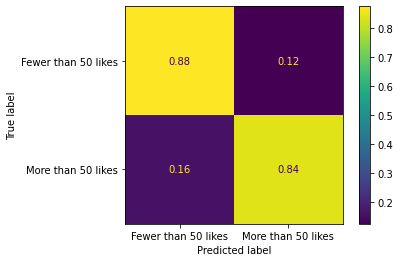

In [123]:
X_variables = ['followers', 'retweet', 'video', 'tweets', 'likes', 'following', 'media', 'verified', 'day', 'hour']

plot_confusion_matrix(clas_rf_model, test[X_variables], test[y_variable_class], normalize='true', display_labels=['Fewer than 50 likes', 'More than 50 likes'])

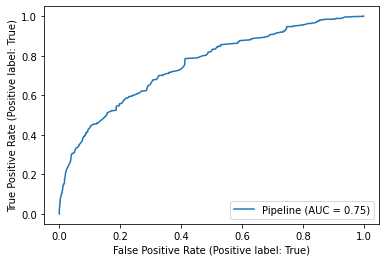

In [124]:
X_variables = ['followers', 'video']

plot_roc_curve(clas_nn_model, test[X_variables], test[y_variable_class])

In [125]:
roc_data = pd.DataFrame(roc_curve(test[y_variable_class], test['predictions_nn_clas_proba'])).transpose().reset_index(drop=True)
roc_data

,0,1,2
0,0.000000,0.00000,1.997707
1,0.000000,0.00018,0.997707
2,0.000000,0.00054,0.996070
3,0.000000,0.00072,0.995440
4,0.000000,0.00108,0.995028
...,...,...,...
952,0.999547,0.99910,0.152563
953,0.999698,0.99910,0.152563
954,1.000000,0.99928,0.152532
955,1.000000,0.99946,0.152481


De esta forma tenemos maneras de evaluar los resultados visualmente de forma sencilla! También podemos sacar los datos nosotros mismos.

### Calibracion
"Entrenamos" un nuevo modelo que nos permite calibrar la probabilidad.

In [126]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

In [127]:
X_variables = ['followers', 'retweet', 'video', 'tweets', 'likes', 'following', 'media', 'verified', 'day', 'hour']

In [128]:
model_to_calibrate = RandomForestClassifier(random_state=0)
calibrated_model = CalibratedClassifierCV(model_to_calibrate)
calibrated_model.fit(train[X_variables], train[y_variable_class])
test['predictions_rf_clas_proba_calibrated'] = calibrated_model.predict_proba(test[X_variables])[:,1]
test['predictions_rf_clas_proba_uncalibrated'] = clas_rf_model.predict_proba(test[X_variables])[:,1]

In [129]:
roc_auc_score(test[y_variable_class], test['predictions_rf_clas_proba_uncalibrated'])

0.9314057266234986

In [130]:
roc_auc_score(test[y_variable_class], test['predictions_rf_clas_proba_calibrated'])

0.9360041185302701

In [131]:
test[[y_variable_class, 'predictions_rf_clas_proba_uncalibrated', 'predictions_rf_clas_proba_calibrated']]

,nlikes_50,predictions_rf_clas_proba_uncalibrated,predictions_rf_clas_proba_calibrated
0,True,1.000000,0.928032
1,True,0.010000,0.076407
2,False,0.190179,0.183462
3,False,0.000000,0.065896
4,False,0.000000,0.065896
...,...,...,...
12170,True,1.000000,0.928032
12171,False,0.000000,0.069286
12172,True,0.978500,0.922178
12173,False,0.000000,0.065896


In [132]:
test[['predictions_rf_clas_proba_uncalibrated', 'predictions_rf_clas_proba_calibrated']].describe()

,predictions_rf_clas_proba_uncalibrated,predictions_rf_clas_proba_calibrated
count,12175.000000,12175.000000
mean,0.451788,0.453399
std,0.430374,0.377265
min,0.000000,0.065896
25%,0.000000,0.067762
50%,0.339833,0.333431
75%,0.970000,0.909760
max,1.000000,0.928032


/home/andreas/anaconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 12'. Pick better value with 'binwidth'.
/home/andreas/anaconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 12'. Pick better value with 'binwidth'.


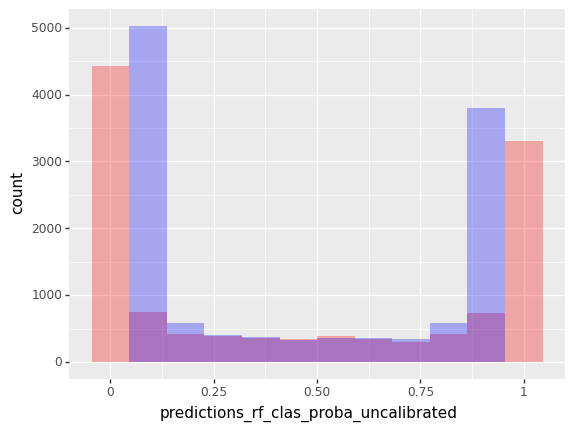

In [135]:
graph = (
    pn.ggplot(test) 
    + pn.geom_histogram(pn.aes(x='predictions_rf_clas_proba_uncalibrated'), fill='red', alpha=0.3)
    + pn.geom_histogram(pn.aes(x='predictions_rf_clas_proba_calibrated'), fill='blue', alpha=0.3)
)

graph.draw();

Vemos que ya es menos extremo y se comporta un poco mejor.

## Optimización
Hay varios aspectos de optimización - es un campo muy grande! Vamos a ver distintos aspectos.

In [136]:
clas_nn_model_param_1 = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(random_state=0))
    ]
)

clas_nn_model_param_1.fit(train[X_variables], train[y_variable_class])
clas_nn_model_param_1.score(test[X_variables], test[y_variable_class])

/home/andreas/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


0.8386858316221766

In [137]:
clas_nn_model_param_2 = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(hidden_layer_sizes=(20, 20, 30), activation='relu', solver='adam', learning_rate='constant', max_iter=400, random_state=0))
    ]
)

clas_nn_model_param_2.fit(train[X_variables], train[y_variable_class])
clas_nn_model_param_2.score(test[X_variables], test[y_variable_class])

0.8470636550308008

Conseguimos mejorar el score casi 1 punto de forma ranzom!

### Elegiendo los features
Primero vemos de nuestro random forest cuales son los mejores features.

In [138]:
[(variable, importance) for variable, importance in zip(X_variables, clas_rf_model.feature_importances_)]

[('followers', 0.19583442511731924),
 ('retweet', 0.17716178523009815),
 ('video', 0.03414963746506507),
 ('tweets', 0.10288071126936024),
 ('likes', 0.08256728365725215),
 ('following', 0.09170791753179156),
 ('media', 0.07812540765333474),
 ('verified', 0.003082088639699519),
 ('day', 0.0794325504210032),
 ('hour', 0.15505819301507617)]

In [139]:
[variable for variable, importance in zip(X_variables, clas_rf_model.feature_importances_) if importance > 0.15]

['followers', 'retweet', 'hour']

Ahora vamos a probar uno de los otros metodos: elegir features que tengan una varianza aceptable

In [140]:
from sklearn.feature_selection import VarianceThreshold

In [141]:
train[X_variables].head()

,followers,retweet,video,tweets,likes,following,media,verified,day,hour
0,892298,False,0,60944,492144,1879,12156,True,7,1
1,9486463,False,1,436279,1694,2729,230691,True,4,5
2,50252746,False,0,443030,18586,841,54199,True,2,18
3,1039067,False,0,25495,1376,229,3838,True,4,23
4,2827393,True,1,148494,281,145,112622,True,7,22


In [142]:
base_p = train[y_variable_class].mean()
min_variance = (1 - base_p) * base_p
feature_selector = VarianceThreshold(min_variance)
feature_selector.fit(train[X_variables])

pd.DataFrame(feature_selector.transform(train[X_variables]))

,0,1,2,3,4,5,6
0,892298,60944,492144,1879,12156,7,1
1,9486463,436279,1694,2729,230691,4,5
2,50252746,443030,18586,841,54199,2,18
3,1039067,25495,1376,229,3838,4,23
4,2827393,148494,281,145,112622,7,22
...,...,...,...,...,...,...,...
28401,11678505,82865,3,7,43980,4,22
28402,3802924,370605,3079,7056,82338,1,16
28403,8170432,306127,307,577,177261,7,3
28404,5684902,99846,142,217,15043,1,19


Vemos que directamente ha quitado algunas columnas ya que no cumplia la minima de varianza

In [143]:
important_features = ['followers', 'retweet', 'hour']

In [144]:
clas_nn_model_param_2_features = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(hidden_layer_sizes=(20, 20, 30), activation='relu', solver='adam', learning_rate='constant', max_iter=400, random_state=0))
    ]
)

clas_nn_model_param_2_features.fit(train[important_features], train[y_variable_class])
clas_nn_model_param_2_features.score(test[important_features], test[y_variable_class])

0.7258316221765914

In [145]:
clas_nn_model_param_2_features = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('nn', MLPClassifier(hidden_layer_sizes=(20, 20, 30), activation='relu', solver='adam', learning_rate='constant', max_iter=400, random_state=0))
    ]
)

clas_nn_model_param_2_features.fit(feature_selector.transform(train[X_variables]), train[y_variable_class])
clas_nn_model_param_2_features.score(feature_selector.transform(test[X_variables]), test[y_variable_class])

0.7626283367556468

Vemos que en estos 2 casos no hemos hecho ninguna mejora. Entendemos ahora que optimización es muy complejo y donde podemos invertir muchos recursos y tampoco sin mucho exito! Lo veremos ahora, pero por esto los Pipelines son aun más importantes.

### Optimizacion formal
Implementamos un metodo brute force con cross validation.

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
grid = {
    'n_estimators' : [100, 500],
    'max_depth' : [None, 5, 10]
}

model = RandomForestClassifier(random_state=0)

optimized_rf_class = GridSearchCV(model, grid)
optimized_rf_class.fit(train[X_variables], train[y_variable_class])
optimized_rf_class.score(test[X_variables], test[y_variable_class])

0.8638193018480493

In [148]:
unoptimized_rf_class = RandomForestClassifier(random_state=0)
unoptimized_rf_class.fit(train[X_variables], train[y_variable_class])
unoptimized_rf_class.score(test[X_variables], test[y_variable_class])

0.8590554414784394

Asi que hemos conseguido mejorar 1 punto pero ahora de forma más estructurada! Podemos ver varios aspectos de la busqueda, lo más importante siendo el mejor estimador.

In [149]:
optimized_rf_class.best_params_

{'max_depth': 10, 'n_estimators': 500}

### Un paso más alla
Ahora podemos combinar esto con nuestros pipelines de antes. Como los pipelines adoptan el sintaxis de un modelo normal - también se pueden optimizar! Solo tenemos que tener algo de cuidado con nuestros nombres. Probamos a optimizar el feature selection que hicimos antes.

In [150]:
pipeline = Pipeline(
    [
        ('feature_selector', VarianceThreshold()),
        ('rf', RandomForestClassifier(random_state=0))
    ]
)

grid = {
    'feature_selector__threshold' : [0, 0.2],
    'rf__n_estimators' : [100, 500],
    'rf__max_depth' : [None, 5, 10]
}

optimized_feature_selection_class = GridSearchCV(pipeline, grid)
optimized_feature_selection_class.fit(train[X_variables], train[y_variable_class])
optimized_feature_selection_class.score(test[X_variables], test[y_variable_class])

0.8638193018480493

In [151]:
optimized_feature_selection_class.best_params_

{'feature_selector__threshold': 0,
 'rf__max_depth': 10,
 'rf__n_estimators': 500}

Vemos ahora que nuestra optimización nos devuelve el mismo resultado que antes: que es mejor no aplicar el filtro de varianza! Podemos estar aquí todo el dia haciendo optimización - pero lo importante es entender como ahora podemos hacer una optimización de todos los pasos de nuestro pipeline de forma estructurada.